In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

np.random.seed(0)

dogs_whisker = np.random.normal(loc=5, scale=1, size=10)
dogs_ef_index = np.random.normal(loc=8, scale=1, size=10)
cats_whisker = np.random.normal(loc=8, scale=1, size=10)
cats_ef_index = np.random.normal(loc=5, scale=1, size=10)

dog_data = np.vstack((dogs_whisker, dogs_ef_index)).T
cat_data = np.vstack((cats_whisker, cats_ef_index)).T
data = np.vstack((dog_data, cat_data))
labels = np.hstack((np.zeros(len(dog_data)), np.ones (len(cat_data))))

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


def random_linear_classifier(dog_data, cat_data, k, d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)#as d=2 it generates theta1 and theta2
        theta0 = np.random.normal()

        error = compute_error(dog_data, cat_data, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0, best_error

def compute_error(dog_data, cat_data, theta, theta0):
    error = 0

    for x in dog_data:
        if np.dot(theta, x) + theta0 <= 0:
            error += 1
    for x in cat_data:
        if np.dot(theta, x) + theta0 > 0:
            error += 1

    return error

In [39]:
#Define function for K-fold cross validation
def cross_validate(data_dogs, data_cats, labels, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(data_dogs):
            x_train_fold = np.vstack((data_dogs[train_index], data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            x_val_fold = np.vstack( (data_dogs [val_index], data_cats [val_index] ))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold, best_theta0_fold, error = random_linear_classifier(x_train_fold [y_train_fold  == 0],
                                                                                 x_train_fold[y_train_fold == 1], k, d)
            
            errors.append (compute_error(x_val_fold[y_val_fold == 0], x_val_fold[y_val_fold == 1],
                                         best_theta_fold, best_theta0_fold))
            
        avg_errors.append (np.mean (errors))

    best_k = k_values[np.argmin(avg_errors)]
    return best_k

#Define k values to try
k_values = [1, 10, 100, 1000, 1500]
best_k = cross_validate(dog_data, cat_data, labels, k_values, d=2)

print(f"Best k: {best_k}")

Best k: 100


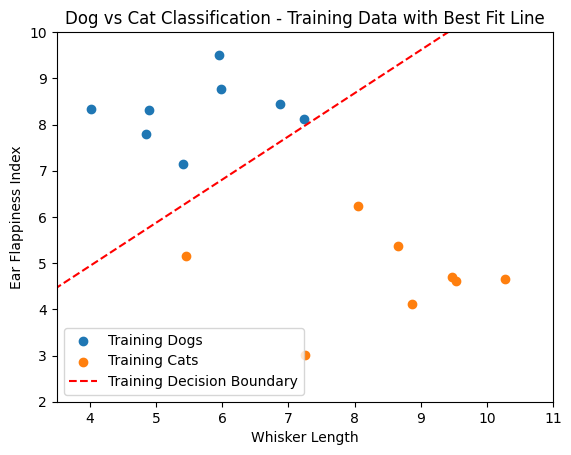

In [40]:
k = best_k
d = 2
best_theta_train, best_theta0_train, train_error = random_linear_classifier(x_train[y_train==0], x_train[y_train==1], k, d)

#Plot the decision boundary
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = (-best_theta_train[0] / best_theta_train[1] * x_vals_train - best_theta0_train / best_theta_train[1])

plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], label='Training Dogs') 
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label='Training Cats') 
plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--', label='Training Decision Boundary')
# Set same limits for x and y axes
plt.xlim([3.5, 11])
plt.ylim([2, 10])
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Training Data with Best Fit Line')
plt. legend()
plt. show()

In [41]:
print(f"Training Error:{train_error}")

Training Error:0


In [42]:
# Compute testing error
test_error = compute_error(x_test[y_test == 0], x_test[y_test == 1], best_theta_train, best_theta0_train)
print(f"Testing Error: {test_error}")

Testing Error: 0
